In [26]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [27]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

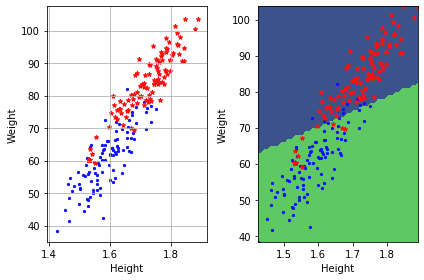

In [28]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    
    
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx\n"
    MSE, w = least_squares(y, tx)
    #raise NotImplementedError

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [29]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
   
    return np.exp(t) / (1 + np.exp(t))
    
    # ***************************************************
    raise NotImplementedError

In [35]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************    
    
    return np.sum(np.log(1 + np.exp(np.matmul(tx, w))) - np.matmul(tx, w)*y)
    
    # ***************************************************
    raise NotImplementedError

In [15]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    
    return np.matmul(np.transpose(tx), sigmoid(np.matmul(tx, w)) - y)

    # ***************************************************
    raise NotImplementedError

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [36]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    
    gradient = calculate_gradient(y, tx, w)
    # compute the gradient: TODO
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    
    w = w - gamma*gradient
    
    # ***************************************************
    #raise NotImplementedError
    return loss, w

Demo!

Current iteration=0, loss=138.62943611198904
Current iteration=100, loss=43.46403230562902
Current iteration=200, loss=41.54589280875939
Current iteration=300, loss=41.098638973663114
Current iteration=400, loss=40.964870635605585
Current iteration=500, loss=40.920089458713036
Current iteration=600, loss=40.90418744318991
Current iteration=700, loss=40.89834994668996
Current iteration=800, loss=40.89616496609549
Current iteration=900, loss=40.8953375338211
Current iteration=1000, loss=40.895021964119
Current iteration=1100, loss=40.894901086855555
Current iteration=1200, loss=40.89485466141426
Current iteration=1300, loss=40.89483680124478
Current iteration=1400, loss=40.89482992328358
Current iteration=1500, loss=40.8948272728955
loss=40.89482664256953


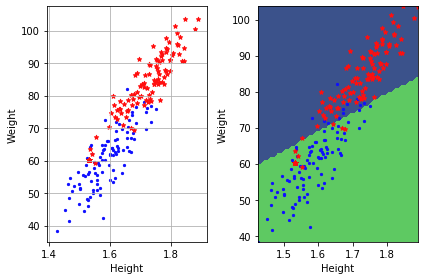

In [39]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [40]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    
    S = np.zeros((len(y), len(y)))
    
    for i in range(len(y)):
        a = sigmoid(np.matmul(tx[i,:], w))
        S[i,i] = a*(1 - a)
    
    return np.matmul(np.matmul(np.transpose(tx), S), tx)
    #return np.matmul(np.matmul(np.transpose(tx), S), tx)
    
    # ***************************************************
    raise NotImplementedError

Write a function below to return loss, gradient, and hessian.

In [41]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, gradient, hessian
    # ***************************************************
    raise NotImplementedError

### Using Newton's method
Use Newton's method for logistic regression.

In [42]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    
    loss, gradient, hessian = logistic_regression(y, tx, w)

    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    
    w = w - np.matmul(np.linalg.inv(hessian),gradient)
    # ***************************************************
    #raise NotImplementedError
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.41155373909581
Current iteration=2, the loss=47.30458619935058
Current iteration=3, the loss=41.997467422484476
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648958
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989059
loss=40.89482560989058


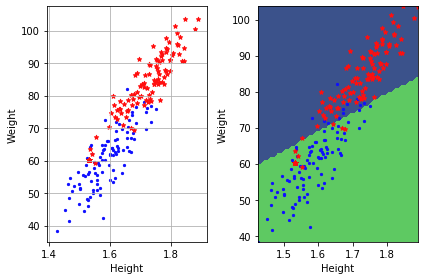

In [43]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [65]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    
    gradient = calculate_gradient(y, tx, w)+lambda_*w
    hessian = calculate_hessian(y, tx, w)
    loss = calculate_loss(y, tx, w)
    
    return loss, gradient, hessian
    
    # ***************************************************
    #raise NotImplementedError

In [66]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    #raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    
    w = w - gamma*gradient
    
    # ***************************************************
    #raise NotImplementedError
    return loss, w

Current iteration=0, loss=138.62943611198904
Current iteration=1, loss=73.65627664417995
Current iteration=2, loss=66.72424553403866
Current iteration=3, loss=63.46831538036224
Current iteration=4, loss=61.496963941306944
Current iteration=5, loss=60.1316592172841
Current iteration=6, loss=59.1004978981565
Current iteration=7, loss=58.27285877497695
Current iteration=8, loss=57.57834624270789
Current iteration=9, loss=56.9758486691251
Current iteration=10, loss=56.439878340753594
Current iteration=11, loss=55.95388147168956
Current iteration=12, loss=55.50669511651013
Current iteration=13, loss=55.09055211016633
Current iteration=14, loss=54.69990084380162
Current iteration=15, loss=54.33067815441672
Current iteration=16, loss=53.979845907202396
Current iteration=17, loss=53.645087028280614
Current iteration=18, loss=53.32460115871786
Current iteration=19, loss=53.016964330225406
Current iteration=20, loss=52.721030806652294
Current iteration=21, loss=52.435863300262014
Current iterati

Current iteration=190, loss=41.63226882105319
Current iteration=191, loss=41.623072191712986
Current iteration=192, loss=41.614005271671026
Current iteration=193, loss=41.605065935814984
Current iteration=194, loss=41.59625210000753
Current iteration=195, loss=41.587561720159336
Current iteration=196, loss=41.57899279132647
Current iteration=197, loss=41.57054334683119
Current iteration=198, loss=41.56221145740571
Current iteration=199, loss=41.553995230358026
Current iteration=200, loss=41.54589280875939
Current iteration=201, loss=41.53790237065257
Current iteration=202, loss=41.530022128280365
Current iteration=203, loss=41.52225032733398
Current iteration=204, loss=41.5145852462203
Current iteration=205, loss=41.50702519534784
Current iteration=206, loss=41.49956851643074
Current iteration=207, loss=41.4922135818102
Current iteration=208, loss=41.48495879379291
Current iteration=209, loss=41.47780258400615
Current iteration=210, loss=41.47074341276871
Current iteration=211, loss=41

Current iteration=377, loss=40.983895573648496
Current iteration=378, loss=40.982964942740914
Current iteration=379, loss=40.98204449986348
Current iteration=380, loss=40.98113412604517
Current iteration=381, loss=40.98023370382614
Current iteration=382, loss=40.97934311723644
Current iteration=383, loss=40.97846225177517
Current iteration=384, loss=40.977590994389814
Current iteration=385, loss=40.976729233456055
Current iteration=386, loss=40.975876858757786
Current iteration=387, loss=40.97503376146752
Current iteration=388, loss=40.974199834127035
Current iteration=389, loss=40.97337497062837
Current iteration=390, loss=40.97255906619508
Current iteration=391, loss=40.9717520173638
Current iteration=392, loss=40.97095372196611
Current iteration=393, loss=40.970164079110646
Current iteration=394, loss=40.96938298916551
Current iteration=395, loss=40.96861035374092
Current iteration=396, loss=40.967846075672185
Current iteration=397, loss=40.96709005900288
Current iteration=398, loss

Current iteration=569, loss=40.9075344996415
Current iteration=570, loss=40.9074094819046
Current iteration=571, loss=40.90728571642963
Current iteration=572, loss=40.90716319033926
Current iteration=573, loss=40.907041890893666
Current iteration=574, loss=40.906921805488835
Current iteration=575, loss=40.906802921655135
Current iteration=576, loss=40.9066852270558
Current iteration=577, loss=40.90656870948543
Current iteration=578, loss=40.90645335686851
Current iteration=579, loss=40.906339157257975
Current iteration=580, loss=40.906226098833784
Current iteration=581, loss=40.90611416990146
Current iteration=582, loss=40.90600335889074
Current iteration=583, loss=40.90589365435413
Current iteration=584, loss=40.905785044965654
Current iteration=585, loss=40.905677519519315
Current iteration=586, loss=40.90557106692795
Current iteration=587, loss=40.90546567622178
Current iteration=588, loss=40.90536133654719
Current iteration=589, loss=40.90525803716534
Current iteration=590, loss=40

Current iteration=836, loss=40.89577250393891
Current iteration=837, loss=40.8957634357581
Current iteration=838, loss=40.895754454856046
Current iteration=839, loss=40.895745560386466
Current iteration=840, loss=40.89573675151135
Current iteration=841, loss=40.89572802740095
Current iteration=842, loss=40.89571938723361
Current iteration=843, loss=40.89571083019574
Current iteration=844, loss=40.89570235548171
Current iteration=845, loss=40.89569396229381
Current iteration=846, loss=40.89568564984209
Current iteration=847, loss=40.8956774173444
Current iteration=848, loss=40.89566926402619
Current iteration=849, loss=40.89566118912053
Current iteration=850, loss=40.89565319186797
Current iteration=851, loss=40.895645271516514
Current iteration=852, loss=40.89563742732151
Current iteration=853, loss=40.8956296585456
Current iteration=854, loss=40.895621964458634
Current iteration=855, loss=40.8956143443376
Current iteration=856, loss=40.89560679746656
Current iteration=857, loss=40.895

Current iteration=1022, loss=40.8949846934391
Current iteration=1023, loss=40.89498317898125
Current iteration=1024, loss=40.89498167897049
Current iteration=1025, loss=40.89498019326858
Current iteration=1026, loss=40.89497872173862
Current iteration=1027, loss=40.894977264245014
Current iteration=1028, loss=40.89497582065346
Current iteration=1029, loss=40.89497439083097
Current iteration=1030, loss=40.89497297464581
Current iteration=1031, loss=40.894971571967524
Current iteration=1032, loss=40.89497018266691
Current iteration=1033, loss=40.89496880661602
Current iteration=1034, loss=40.894967443688095
Current iteration=1035, loss=40.89496609375764
Current iteration=1036, loss=40.894964756700325
Current iteration=1037, loss=40.894963432393055
Current iteration=1038, loss=40.89496212071389
Current iteration=1039, loss=40.89496082154206
Current iteration=1040, loss=40.89495953475797
Current iteration=1041, loss=40.89495826024316
Current iteration=1042, loss=40.89495699788033
Current i

Current iteration=1273, loss=40.894840088052874
Current iteration=1274, loss=40.89483995062028
Current iteration=1275, loss=40.894839814493054
Current iteration=1276, loss=40.89483967965879
Current iteration=1277, loss=40.8948395461052
Current iteration=1278, loss=40.894839413820115
Current iteration=1279, loss=40.894839282791466
Current iteration=1280, loss=40.894839153007304
Current iteration=1281, loss=40.894839024455806
Current iteration=1282, loss=40.89483889712526
Current iteration=1283, loss=40.89483877100405
Current iteration=1284, loss=40.894838646080686
Current iteration=1285, loss=40.894838522343775
Current iteration=1286, loss=40.89483839978203
Current iteration=1287, loss=40.8948382783843
Current iteration=1288, loss=40.89483815813952
Current iteration=1289, loss=40.89483803903671
Current iteration=1290, loss=40.89483792106503
Current iteration=1291, loss=40.89483780421372
Current iteration=1292, loss=40.89483768847215
Current iteration=1293, loss=40.894837573829754
Curren

Current iteration=1531, loss=40.89482684753493
Current iteration=1532, loss=40.89482683579709
Current iteration=1533, loss=40.894826824170586
Current iteration=1534, loss=40.89482681265437
Current iteration=1535, loss=40.894826801247405
Current iteration=1536, loss=40.894826789948624
Current iteration=1537, loss=40.894826778757036
Current iteration=1538, loss=40.894826767671596
Current iteration=1539, loss=40.894826756691316
Current iteration=1540, loss=40.89482674581519
Current iteration=1541, loss=40.894826735042216
Current iteration=1542, loss=40.89482672437144
Current iteration=1543, loss=40.894826713801876
Current iteration=1544, loss=40.89482670333258
Current iteration=1545, loss=40.89482669296259
Current iteration=1546, loss=40.89482668269095
Current iteration=1547, loss=40.89482667251675
Current iteration=1548, loss=40.894826662439044
Current iteration=1549, loss=40.89482665245695
loss=40.89482664256953


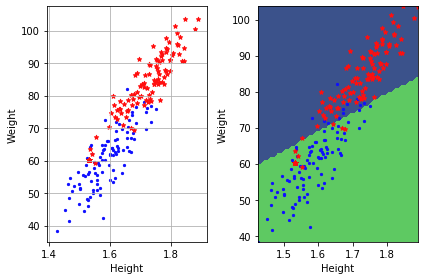

In [70]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
logistic_regression_penalized_gradient_descent_demo(y, x)